<a href="https://colab.research.google.com/github/ChengyuWang1007/Compressive-Holography/blob/main/diffraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diffraction in Projective Coordinates
## David Brady
## University of Arizona
## January 2021

Here we consider wave propagation from an aperture in constant SBP units


## initialization

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage
from skimage import io
from skimage import transform
from skimage import filters
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]


## problem definition

we consider imaging a remote object with coherent light. The basic system geometry is shown below.

--2021-01-23 19:35:22--  https://docs.google.com/uc?export=download&confirm=&id=1SRLPBvRi3d1Yo-143JmF14o_WIEDhxFX
Resolving docs.google.com (docs.google.com)... 172.217.204.100, 172.217.204.113, 172.217.204.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-60-docs.googleusercontent.com/docs/securesc/ercnbot5s7nifeaje8bcq6a4auq8l5fn/s76j53tfjlb181o0k50ulkcuqoi7dvav/1611430500000/09386012468922455624/14455809989500848321Z/1SRLPBvRi3d1Yo-143JmF14o_WIEDhxFX?e=download [following]
--2021-01-23 19:35:23--  https://doc-04-60-docs.googleusercontent.com/docs/securesc/ercnbot5s7nifeaje8bcq6a4auq8l5fn/s76j53tfjlb181o0k50ulkcuqoi7dvav/1611430500000/09386012468922455624/14455809989500848321Z/1SRLPBvRi3d1Yo-143JmF14o_WIEDhxFX?e=download
Resolving doc-04-60-docs.googleusercontent.com (doc-04-60-docs.googleusercontent.com)... 64.233.170.132, 2607:f8b0:400c:c0d::84
Connecting

(-0.5, 1919.5, 1079.5, -0.5)

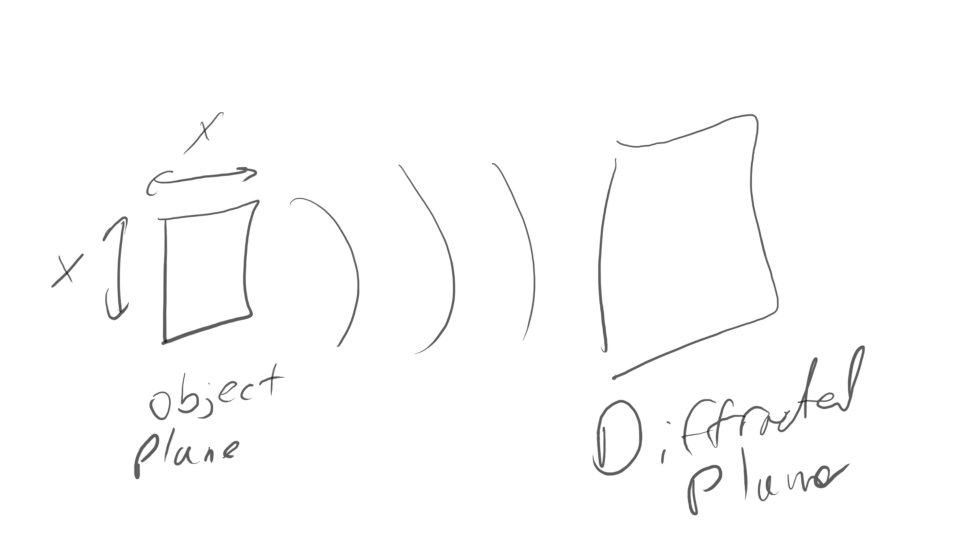

In [8]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SRLPBvRi3d1Yo-143JmF14o_WIEDhxFX' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1SRLPBvRi3d1Yo-143JmF14o_WIEDhxFX" -O system.jpg && rm -rf /tmp/cookies.txt
dog = io.imread('system.jpg')
plt.imshow(np.rot90(dog))
plt.axis(False)


The object plane plane image has bandwidth B and spatial extent X. Accordingly, we represent it by $16B^2X^2$ samples, with sample distance $\frac{1}{2B}$ covering $(-2X,2X)$ in the xy plane. The transfer function for the diffracted field is $\exp\left (-2\pi id\sqrt{\frac{1}{\lambda^2}-u^2-v^2}\right )$, where $d$ is the distance between the object plane and the diffracted plane. 

Let $f(x,y)$ be the distribution in the object plane. We know that $f(x,y)=0$ for $|x|,|y|>X$. However, as the field diffracts the region of support increases to approximately $X+\lambda dB$. Assuming that the space bandwidth product stays constant, the bandwidth decreases to $\frac{BX}{X+\lambda dB}$. In the diffracted plane we seek to estimate not the diffracted field $g(x,y)$ but the scaled diffracted field $g(\alpha x,\alpha y)$, where $\alpha =1+\frac{\lambda dB}{X}$. Note that the Fourier transform of the scaled diffracted field is
$$
\cal{F} \lbrace g(\alpha x,\alpha y) \rbrace=\frac{1}{\alpha} {\hat g}\left (\frac{u}{\alpha},\frac{v}{\alpha}\right )
$$
Knowing that ${\hat g}(u,v)=\exp\left (-2\pi id\sqrt{\frac{1}{\lambda^2}-u^2-v^2}\right ){\hat f}(u,v)$ we can take the Fourier transformation of $f(x,y)$ to estimate ${\hat f}(u,v)$ and then rescale to estimate ${\hat g}(\frac{u}{\alpha},\frac{v}{\alpha})$, inverse Fourier transform then gives us $g(\alpha x,\alpha y)$. 